In [1]:
import pandas as pd

In [2]:
gages = pd.read_csv('./USGS Flow/Gages.csv')
gages

,EVENTDATE,REACHCODE,REACHSMDAT,REACHRESOL,FEATURECOM,FEATURECLA,SOURCE_ORI,SOURCE_DAT,SOURCE_FEA,FEATUREDET,Measure,Offset,EventType,FLComID,POINT_X,POINT_Y,POINT_Z,POINT_M
0,2014-12-04 00:00,1.100010e+12,NaN,Medium,0,0,"USGS, Water Resources Division",,1.206900e+06,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,45.31563,0,StreamGage,7712706,-73.069576,41.673986,0,45.31563
1,2014-12-04 00:00,1.100010e+12,NaN,Medium,0,0,"USGS, Water Resources Division",,1.206000e+06,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,15.86635,0,StreamGage,7713630,-73.063803,41.704479,0,15.86635
2,2014-12-04 00:00,1.090000e+12,NaN,Medium,0,0,"USGS, Water Resources Division",,1.105917e+06,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,9.65026,0,StreamGage,5878903,-70.838619,41.662913,0,9.65026
3,2014-12-04 00:00,1.100010e+12,NaN,Medium,0,0,"USGS, Water Resources Division",,1.205500e+06,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,45.47307,0,StreamGage,7718288,-73.167566,41.383470,0,45.47307
4,2014-12-04 00:00,1.090000e+12,NaN,Medium,0,0,"USGS, Water Resources Division",,1.109200e+06,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,69.19802,0,StreamGage,6129557,-71.254757,41.879573,0,69.19802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28159,2012-12-06 00:00,2.101000e+13,2012-02-27 00:00,High,0,0,United States Geological Survey (USGS),National Water Information System (NWIS),1.802240e+14,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,83.12687,0,StreamGage,800040636,-65.919321,18.038005,0,83.12687
28160,2012-12-06 00:00,2.101000e+13,2012-02-27 00:00,High,0,0,United States Geological Survey (USGS),National Water Information System (NWIS),1.802030e+14,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,96.73209,0,StreamGage,800025568,-65.906174,18.033222,0,96.73209
28161,2012-12-06 00:00,2.101000e+13,2012-02-27 00:00,High,0,0,United States Geological Survey (USGS),National Water Information System (NWIS),5.009121e+07,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,81.30001,0,StreamGage,800036345,-65.905677,17.996457,0,81.30001
28162,2014-12-04 00:00,4.040000e+12,NaN,Medium,0,0,"USGS, Water Resources Division",,4.087047e+06,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,33.61331,0,StreamGage,12163786,-88.027910,43.221473,0,33.61331


In [3]:
flow = pd.read_excel('./USGS Flow/GageFlow2.xlsx',parse_dates=['datetime'])
flow

,agency_cd,site_no,datetime,tz_cd,flow,flow_cd
0,USGS,1200000,2011-08-26 00:00:00,EDT,128.0,A
1,USGS,1200000,2011-08-26 00:15:00,EDT,139.0,A
2,USGS,1200000,2011-08-26 00:30:00,EDT,150.0,A
3,USGS,1200000,2011-08-26 00:45:00,EDT,154.0,A
4,USGS,1200000,2011-08-26 01:00:00,EDT,156.0,A
...,...,...,...,...,...,...
233820,USGS,1581757,2011-08-31 05:15:00,EDT,42.7,A
233821,USGS,1581757,2011-08-31 05:30:00,EDT,42.7,A
233822,USGS,1581757,2011-08-31 05:45:00,EDT,42.7,A
233823,USGS,1581757,2011-08-31 06:00:00,EDT,41.6,A


In [4]:
type(flow.datetime[0])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
key = gages[['SOURCE_FEA', 'FLComID']]
key

,SOURCE_FEA,FLComID
0,1.206900e+06,7712706
1,1.206000e+06,7713630
2,1.105917e+06,5878903
3,1.205500e+06,7718288
4,1.109200e+06,6129557
...,...,...
28159,1.802240e+14,800040636
28160,1.802030e+14,800025568
28161,5.009121e+07,800036345
28162,4.087047e+06,12163786


In [6]:
flow2 = flow.merge(key, left_on='site_no', right_on='SOURCE_FEA')
flow2

,agency_cd,site_no,datetime,tz_cd,flow,flow_cd,SOURCE_FEA,FLComID
0,USGS,1200000,2011-08-26 00:00:00,EDT,128.0,A,1200000.0,7712756
1,USGS,1200000,2011-08-26 00:15:00,EDT,139.0,A,1200000.0,7712756
2,USGS,1200000,2011-08-26 00:30:00,EDT,150.0,A,1200000.0,7712756
3,USGS,1200000,2011-08-26 00:45:00,EDT,154.0,A,1200000.0,7712756
4,USGS,1200000,2011-08-26 01:00:00,EDT,156.0,A,1200000.0,7712756
...,...,...,...,...,...,...,...,...
217697,USGS,1581757,2011-08-31 05:15:00,EDT,42.7,A,1581757.0,11688674
217698,USGS,1581757,2011-08-31 05:30:00,EDT,42.7,A,1581757.0,11688674
217699,USGS,1581757,2011-08-31 05:45:00,EDT,42.7,A,1581757.0,11688674
217700,USGS,1581757,2011-08-31 06:00:00,EDT,41.6,A,1581757.0,11688674


In [7]:
maxflow = flow2[0:0]
maxflow

,agency_cd,site_no,datetime,tz_cd,flow,flow_cd,SOURCE_FEA,FLComID


In [8]:
for catch in flow2.site_no.unique():
    subset = flow2.loc[flow2.site_no == catch]
    maxflow = maxflow.append(subset.loc[subset.flow == subset.flow.max()])
#     print(f'Catch: {catch} Flow: {subset.flow.max()}')
#     print(subset.flow.max())

In [9]:
maxflow

,agency_cd,site_no,datetime,tz_cd,flow,flow_cd,SOURCE_FEA,FLComID
263,USGS,1200000,2011-08-28 17:45:00,EDT,7640.0,A,1200000.0,7712756
264,USGS,1200000,2011-08-28 18:00:00,EDT,7640.0,A,1200000.0,7712756
904,USGS,1209761,2011-08-28 09:45:00,EDT,73.1,A,1209761.0,7732311
1575,USGS,1209901,2011-08-28 09:15:00,EDT,1000.0,A,1209901.0,7733045
2250,USGS,1212500,2011-08-28 09:45:00,EDT,2690.0,A,1212500.0,7733091
...,...,...,...,...,...,...,...,...
215382,USGS,1581649,2011-08-28 03:00:00,EDT,2510.0,A,1581649.0,11688478
216056,USGS,1581700,2011-08-28 03:15:00,EDT,1600.0,A,1581700.0,11687474
216057,USGS,1581700,2011-08-28 03:30:00,EDT,1600.0,A,1581700.0,11687474
216720,USGS,1581752,2011-08-28 01:15:00,EDT,674.0,A:R,1581752.0,11688352


In [10]:
type(maxflow.datetime)

pandas.core.series.Series

In [11]:
from datetime import datetime, timedelta
maxflow2 = maxflow.copy()
maxflow2.datetime = maxflow2.datetime + timedelta(hours=4, minutes=0)
maxflow2 = maxflow2.drop_duplicates(subset='site_no')
maxflow2

,agency_cd,site_no,datetime,tz_cd,flow,flow_cd,SOURCE_FEA,FLComID
263,USGS,1200000,2011-08-28 21:45:00,EDT,7640.0,A,1200000.0,7712756
904,USGS,1209761,2011-08-28 13:45:00,EDT,73.1,A,1209761.0,7732311
1575,USGS,1209901,2011-08-28 13:15:00,EDT,1000.0,A,1209901.0,7733045
2250,USGS,1212500,2011-08-28 13:45:00,EDT,2690.0,A,1212500.0,7733091
2920,USGS,1301500,2011-08-28 12:00:00,EST,500.0,A,1301500.0,6241857
...,...,...,...,...,...,...,...,...
214709,USGS,1581500,2011-08-28 07:00:00,EDT,1960.0,A,1581500.0,11687752
215382,USGS,1581649,2011-08-28 07:00:00,EDT,2510.0,A,1581649.0,11688478
216056,USGS,1581700,2011-08-28 07:15:00,EDT,1600.0,A,1581700.0,11687474
216720,USGS,1581752,2011-08-28 05:15:00,EDT,674.0,A:R,1581752.0,11688352


In [12]:
# nwm = pd.read_excel('./NWM Flow/all_flows.xlsx')
nwm = pd.read_csv('./NWM Flow/maxflow.csv')
nwm

,COMID,Q,H
0,1748535,19.100000,1.345038
1,1748537,57.969999,2.152236
2,1748539,20.270000,1.152600
3,1748541,131.899997,2.535395
4,1748543,72.239998,1.628032
...,...,...,...
30202,932050172,35.809999,1.109603
30203,932050173,2.440000,0.144782
30204,932060023,83.689998,2.956866
30205,932060024,81.219998,2.003211


In [13]:
maxflow2 = maxflow2.merge(nwm, left_on='FLComID', right_on='COMID')
maxflow2

,agency_cd,site_no,datetime,tz_cd,flow,flow_cd,SOURCE_FEA,FLComID,COMID,Q,H
0,USGS,1301500,2011-08-28 12:00:00,EST,500.0,A,1301500.0,6241857,6241857,7.440000,0.840407
1,USGS,1302020,2011-08-28 23:15:00,EST,2710.0,A,1302020.0,6241423,6241423,331.349993,4.221821
2,USGS,1302050,2011-08-28 10:00:00,EST,65.6,A,1302050.0,9509692,9509692,16.720000,1.411391
3,USGS,1311500,2011-08-28 10:00:00,EST,259.0,A,1311500.0,9499706,9499706,23.389999,2.195514
4,USGS,1311810,2011-08-28 07:15:00,EST,185.0,A,1311810.0,9498634,9498634,27.569999,2.339899
...,...,...,...,...,...,...,...,...,...,...,...
285,USGS,1502731,2011-08-29 00:15:00,EST,18400.0,A,1502731.0,8088063,8088063,1880.299958,5.651024
286,USGS,1534300,2011-08-30 06:15:00,EDT,769.0,A,1534300.0,2598631,2598631,40.449999,1.388924
287,USGS,1534500,2011-08-28 14:00:00,EDT,1920.0,A,1534500.0,2598765,2598765,125.379997,2.185415
288,USGS,1536000,2011-08-28 18:45:00,EDT,7410.0,A,1536000.0,2600273,2600273,371.329992,14.269695


In [14]:
maxflow2['flow_m3s'] = ''
maxflow2['flow_m3s'] = maxflow2['flow'] * (0.3048 ** 3)
maxflow2

,agency_cd,site_no,datetime,tz_cd,flow,flow_cd,SOURCE_FEA,FLComID,COMID,Q,H,flow_m3s
0,USGS,1301500,2011-08-28 12:00:00,EST,500.0,A,1301500.0,6241857,6241857,7.440000,0.840407,14.158423
1,USGS,1302020,2011-08-28 23:15:00,EST,2710.0,A,1302020.0,6241423,6241423,331.349993,4.221821,76.738654
2,USGS,1302050,2011-08-28 10:00:00,EST,65.6,A,1302050.0,9509692,9509692,16.720000,1.411391,1.857585
3,USGS,1311500,2011-08-28 10:00:00,EST,259.0,A,1311500.0,9499706,9499706,23.389999,2.195514,7.334063
4,USGS,1311810,2011-08-28 07:15:00,EST,185.0,A,1311810.0,9498634,9498634,27.569999,2.339899,5.238617
...,...,...,...,...,...,...,...,...,...,...,...,...
285,USGS,1502731,2011-08-29 00:15:00,EST,18400.0,A,1502731.0,8088063,8088063,1880.299958,5.651024,521.029977
286,USGS,1534300,2011-08-30 06:15:00,EDT,769.0,A,1534300.0,2598631,2598631,40.449999,1.388924,21.775655
287,USGS,1534500,2011-08-28 14:00:00,EDT,1920.0,A,1534500.0,2598765,2598765,125.379997,2.185415,54.368345
288,USGS,1536000,2011-08-28 18:45:00,EDT,7410.0,A,1536000.0,2600273,2600273,371.329992,14.269695,209.827833


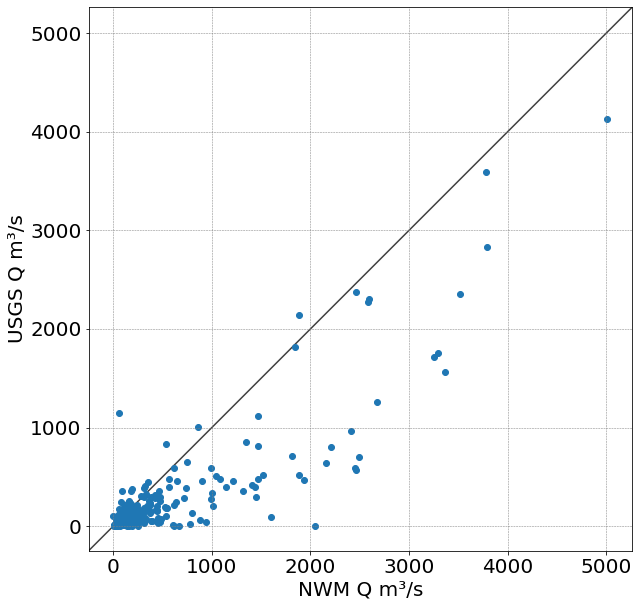

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# fig, ax = plt.subplots()
ax.scatter(x=maxflow2['Q'], y=maxflow2['flow_m3s'])
# ax.legend()
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims); ax.set_ylim(lims)
plt.xlabel("NWM Q m³/s"); plt.ylabel("USGS Q m³/s")
plt.grid(color = 'gray', linestyle='--',linewidth = 0.5)
# plt.savefig('StreamDepth.png')


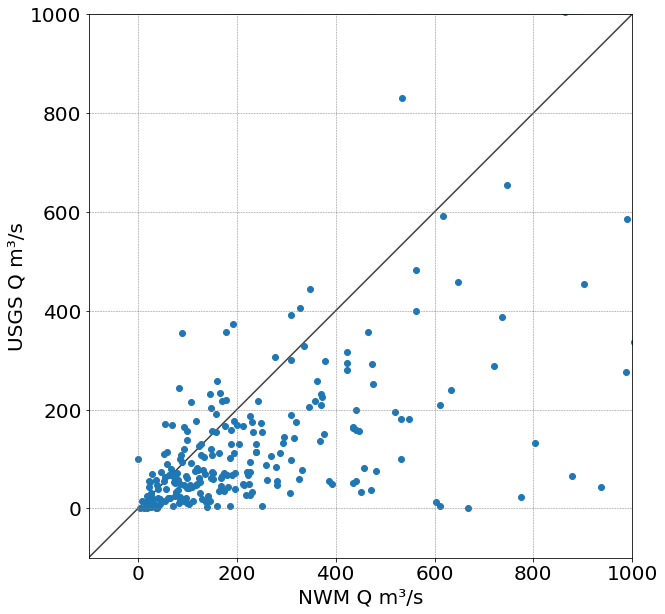

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# fig, ax = plt.subplots()
ax.scatter(x=maxflow2['Q'], y=maxflow2['flow_m3s'])
# ax.legend()
lims = [-100, 1000]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims); ax.set_ylim(lims)
plt.xlabel("NWM Q m³/s"); plt.ylabel("USGS Q m³/s")
plt.grid(color = 'gray', linestyle='--',linewidth = 0.5)
# plt.savefig('StreamDepth.png')


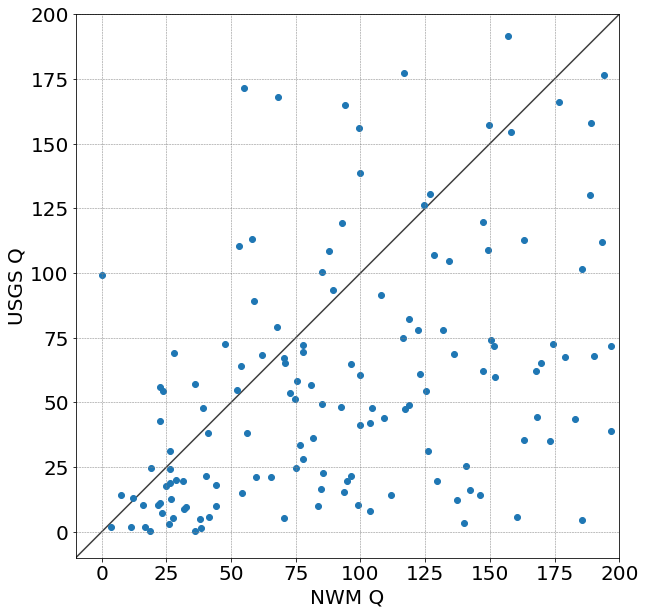

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

# fig, ax = plt.subplots()
ax.scatter(x=maxflow2['Q'], y=maxflow2['flow_m3s'])
# ax.legend()
lims = [-10, 200]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims); ax.set_ylim(lims)
plt.xlabel("NWM Q"); plt.ylabel("USGS Q")
plt.grid(color = 'gray', linestyle='--',linewidth = 0.5)
# plt.savefig('StreamDepth.png')

In [18]:
import sklearn.metrics as metrics
maxflow3 = maxflow2.dropna()
r2 = metrics.r2_score(maxflow3['Q'], maxflow3['flow_m3s'])
print(r2)

0.6215292245562551
